<a href="https://colab.research.google.com/github/Hyejin-Koo/EE4178/blob/master/%5BIntro%5D_Pytorch_(simple_network_with_CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공지능(딥러닝)개론 EE4178
## Pytorch 실습


---
Day1. Intro


> 0. Google Colab and Basic Python

> 1. Pytorch

> 2. XOR in Pytorch









## 1. Pytorch

### 1.1 Tensors / Numpy

In [ ]:
import torch
import numpy as np

## colab의 경우, 대부분의 package install 필요 없음 (바로 import 가능)
## 패키지 설치가 필요할 경우: 'pip install package_name'

**Python List / Numpy / Tensors**
* Python List: 행렬 연산을 위해 for 문 사용
* Numpy : 차원이 다른 행렬 간에도 연산이 가능
* Tensor : GPU 상에서 연산이 가능하고 autograd(자동 미분)연산 기능이 있는 자료형

#### Tensor 생성 및 초기화

In [ ]:
# 초기화되지 않은 행렬 생성
x = torch.empty(5,3)
print(x)

tensor([[-2.4394e-06,  0.0000e+00,  1.4396e-38],
        [ 0.0000e+00,  3.2230e-44,  0.0000e+00],
        [        nan,         nan,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [ ]:
# 0 ~ 1 사이의 랜덤 초기화 행렬 생성
x = torch.rand(5,3)
print(x)

tensor([[0.1113, 0.7561, 0.7733],
        [0.2754, 0.8645, 0.7153],
        [0.6321, 0.1599, 0.9180],
        [0.9674, 0.0300, 0.3314],
        [0.6207, 0.1171, 0.1962]])


In [ ]:
x.mean()

tensor(0.4979)

In [ ]:
x.std()

tensor(0.3328)

In [ ]:
# Standard Normal Distribution에서 랜덤 초기화 행렬 생성
x = torch.randn(5,3)
print(x)

tensor([[-1.2664, -1.1700, -0.2691],
        [ 1.1601, -1.6574,  0.6775],
        [ 0.8556,  0.2810, -0.7043],
        [ 1.0276, -0.0337, -1.5780],
        [ 1.8412, -1.2262,  0.1560]])


In [ ]:
x.mean()

tensor(-0.1271)

In [ ]:
x.std()

tensor(1.1060)

In [ ]:
# 특정 값을 tensor로 만들기
x = torch.tensor([[1.2, 4.5],[1,2]])
x

tensor([[1.2000, 4.5000],
        [1.0000, 2.0000]])

#### Tensor size & Numpy 변환

In [ ]:
# Size 확인
x = torch.randn(3,4)
print(x)
print("x size : ", x.size())

tensor([[ 0.6914, -1.4307,  1.1422, -0.1958],
        [-1.1402, -1.1508, -0.8876, -0.4204],
        [ 0.0159,  1.0341,  1.3965,  0.3026]])
x size :  torch.Size([3, 4])


In [ ]:
# Resize - "reshape" : any tensor
x = torch.rand(3,4)
y = x.reshape(4,3)
z = x.reshape(-1, 2)
print(x, x.size(), "\n", y, y.size(), "\n", z, z.size())

tensor([[0.6367, 0.6571, 0.1361, 0.8993],
        [0.0779, 0.6828, 0.7439, 0.0740],
        [0.1971, 0.9843, 0.7021, 0.7085]]) torch.Size([3, 4]) 
 tensor([[0.6367, 0.6571, 0.1361],
        [0.8993, 0.0779, 0.6828],
        [0.7439, 0.0740, 0.1971],
        [0.9843, 0.7021, 0.7085]]) torch.Size([4, 3]) 
 tensor([[0.6367, 0.6571],
        [0.1361, 0.8993],
        [0.0779, 0.6828],
        [0.7439, 0.0740],
        [0.1971, 0.9843],
        [0.7021, 0.7085]]) torch.Size([6, 2])


In [ ]:
# Resize - "view" : for contiguous tensors
x = torch.randn(3,4)
y = x.view(4,3)
z = x.view(-1, 2)
print(x, x.size(), "\n", y, y.size(), "\n", z, z.size())

tensor([[ 9.3655e-01,  2.1173e-01, -4.6866e-01, -2.5465e+00],
        [ 2.2822e+00,  3.6694e-01, -1.9738e-01, -7.5453e-01],
        [-7.8012e-01, -2.6918e-01,  2.2160e-01,  1.7148e-03]]) torch.Size([3, 4]) 
 tensor([[ 9.3655e-01,  2.1173e-01, -4.6866e-01],
        [-2.5465e+00,  2.2822e+00,  3.6694e-01],
        [-1.9738e-01, -7.5453e-01, -7.8012e-01],
        [-2.6918e-01,  2.2160e-01,  1.7148e-03]]) torch.Size([4, 3]) 
 tensor([[ 9.3655e-01,  2.1173e-01],
        [-4.6866e-01, -2.5465e+00],
        [ 2.2822e+00,  3.6694e-01],
        [-1.9738e-01, -7.5453e-01],
        [-7.8012e-01, -2.6918e-01],
        [ 2.2160e-01,  1.7148e-03]]) torch.Size([6, 2])


#### Tensor, Numpy 변환

In [ ]:
# Tensor to numpy
x = torch.ones(5)
y = x.numpy()
print(x, type(x))
print(y, type(y))

tensor([1., 1., 1., 1., 1.]) <class 'torch.Tensor'>
[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>


In [ ]:
# Numpy to tensor
x = np.ones(5)
y = torch.from_numpy(x)
print(x, type(x))
print(y, type(y))

[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>
tensor([1., 1., 1., 1., 1.], dtype=torch.float64) <class 'torch.Tensor'>


In [ ]:
# GPU 연산을 위한 CUDA tensor
x = torch.ones(5)
y = x.to(device="cuda:0") #런타임 연결 gpu로 설정
print(x)
print(y)

tensor([1., 1., 1., 1., 1.])
tensor([1., 1., 1., 1., 1.], device='cuda:0')


#### Tensor Autograd
requires_grad를 true로 세팅하면 tensor에 대한 모든 연산 추적 가능

이를 통해 forward propagation 후, .backward() 호출 시 모든 gradient 자동으로 계산



In [ ]:
x = torch.tensor(([1., 2.], [3., 4.]), requires_grad=True)
print(x)
y = (x+2) **2 *3
print(y)

out = y.mean()
print(out)

out.backward()
print(x.grad)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[ 27.,  48.],
        [ 75., 108.]], grad_fn=<MulBackward0>)
tensor(64.5000, grad_fn=<MeanBackward0>)
tensor([[4.5000, 6.0000],
        [7.5000, 9.0000]])


$$
\frac{\partial out}{\partial x} = \frac{\partial out}{\partial y} \frac{\partial y}{\partial x_i} = \frac{1}{4}6(x_i+2)
$$

### 1.2 Pytorch Project

#### 1.2.1 Load data

In [ ]:
import torchvision # to download 'CIFAR10' datasest
import torchvision.transforms as transforms  # to manipulate input data

In [ ]:
train_data = torchvision.datasets.CIFAR10(root='./datasets',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)

Files already downloaded and verified


In [ ]:
# data check
image, label = train_data[0]
print(len(train_data), image.size(), label)

50000 torch.Size([3, 32, 32]) 6


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

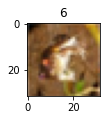

In [ ]:
plt.subplot(141)
plt.imshow(image.permute(2,1,0))
plt.title(label)
plt.show()

#### 1.2.2. Define Dataloader

define dataloader (dataloader loads data from queue while iters loop)

In [ ]:
import torch

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=64,
                                          shuffle=True)

In [ ]:
# check how data loader works
print(len(data_loader))
for idx, (images, labels) in enumerate(data_loader):
  if idx ==3:
    break
  print(image.size(), labels)

782
torch.Size([3, 32, 32]) tensor([5, 3, 2, 9, 2, 4, 6, 6, 0, 5, 0, 0, 7, 2, 2, 8, 1, 1, 7, 9, 9, 1, 5, 4,
        9, 8, 9, 3, 2, 3, 0, 1, 8, 7, 1, 1, 8, 4, 7, 6, 7, 8, 1, 8, 1, 9, 9, 9,
        0, 3, 1, 2, 6, 8, 3, 2, 1, 7, 2, 3, 7, 4, 1, 0])
torch.Size([3, 32, 32]) tensor([6, 3, 3, 8, 4, 8, 4, 1, 0, 6, 3, 0, 9, 8, 2, 9, 0, 5, 7, 3, 3, 3, 2, 0,
        7, 6, 2, 0, 1, 8, 2, 0, 7, 0, 7, 6, 0, 1, 2, 1, 3, 8, 1, 7, 4, 2, 1, 4,
        6, 1, 5, 7, 5, 7, 0, 8, 9, 7, 6, 1, 3, 1, 8, 9])
torch.Size([3, 32, 32]) tensor([5, 0, 7, 9, 3, 4, 6, 9, 6, 8, 1, 9, 9, 6, 5, 0, 1, 4, 1, 5, 3, 6, 5, 7,
        6, 3, 1, 6, 8, 6, 9, 3, 5, 9, 0, 5, 4, 7, 6, 2, 4, 0, 8, 6, 0, 7, 8, 1,
        8, 3, 3, 1, 6, 8, 8, 2, 4, 8, 8, 7, 2, 1, 2, 5])


#### 1.2.3. Define Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    self.fc = nn.Linear(6*14*14, 10)


  def forward(self, x):
    out = self.layer1(x)
    out = out.reshape(out.size(0),-1)
    out = self.fc(out)

    return out

model = Net()

In [ ]:
# check which layers constitue Network
print(model)

Net(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1176, out_features=10, bias=True)
)


In [ ]:
# check how data passes through the Network
data_iter = iter(data_loader)
images, labels = data_iter.next()
outputs = model(images)
print(outputs.size(), '\n', outputs[0], '\n', outputs[0].tolist().index(max(outputs[0])))

torch.Size([64, 10]) 
 tensor([ 1.8770, -0.6668, -0.4353, -1.1240,  0.1158,  0.0830,  0.2002, -0.9187,
        -0.0178,  0.5045], grad_fn=<SelectBackward>) 
 0


#### 1.2.4. Set Loss & Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

#### 1.2.5. Train / Test

In [ ]:
epochs = 1
for epoch in range(epochs):
  for i, (images, labels) in enumerate(data_loader):
    # Forward Propagate
    outputs = model(images)

    # Get Loss, Compute Gradients, Update Parameters
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 50 == 0 or (i+1)==len(data_loader):
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, i+1, len(data_loader), loss.item()))


Epoch [1/1], Step [1/782], Loss: 2.2497
Epoch [1/1], Step [51/782], Loss: 2.2591
Epoch [1/1], Step [101/782], Loss: 2.1723
Epoch [1/1], Step [151/782], Loss: 2.1571
Epoch [1/1], Step [201/782], Loss: 2.1972
Epoch [1/1], Step [251/782], Loss: 2.1233
Epoch [1/1], Step [301/782], Loss: 1.9679
Epoch [1/1], Step [351/782], Loss: 1.9504
Epoch [1/1], Step [401/782], Loss: 2.0126
Epoch [1/1], Step [451/782], Loss: 2.0462
Epoch [1/1], Step [501/782], Loss: 1.8446
Epoch [1/1], Step [551/782], Loss: 1.9124
Epoch [1/1], Step [601/782], Loss: 1.9011
Epoch [1/1], Step [651/782], Loss: 1.8230
Epoch [1/1], Step [701/782], Loss: 1.8015
Epoch [1/1], Step [751/782], Loss: 1.7561
Epoch [1/1], Step [782/782], Loss: 2.1222


#### 1.2.6. Save & Visualization

In [ ]:
torch.save(model.state_dict(), 'my_model.pth')

In [ ]:
# check the saved model
! ls

datasets  my_model.pth	sample_data
